In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner 
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmpl9khubsxGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')
# images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
# masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

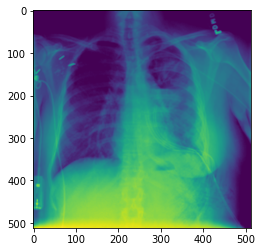

In [5]:
imshow(images[0])

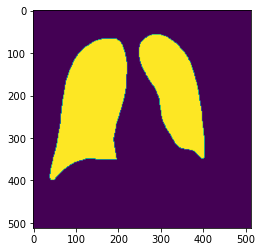

In [6]:
imshow(masks[0])

In [7]:
images = images[:6012]

In [8]:
masks = masks[:6012]

In [9]:
images.shape

(6012, 512, 512, 1)

In [10]:
masks.shape

(6012, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 24s 3s/step - loss: 0.8018 - dice_coeff: 0.3362 - val_loss: 0.6771 - val_dice_coeff: 0.3040
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.7744 - dice_coeff: 0.3475 - val_loss: 0.6712 - val_dice_coeff: 0.3033
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.7508 - dice_coeff: 0.3576 - val_loss: 0.6670 - val_dice_coeff: 0.3022
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.7356 - dice_coeff: 0.3661 - val_loss: 0.6628 - val_dice_coeff: 0.3010
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.7222 - dice_coeff: 0.3668 - val_loss: 0.6595 - val_dice_coeff: 0.3003
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.7062 - dice_coeff: 0.3712 - val_loss: 0.6574 - val_dice_coeff: 0.3002
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.6948 - dice_coeff: 0.3743 - val_loss: 0.6553 - va

In [13]:
R.classifier_scores

[[0.2890557050704956, 0.6761355996131897],
 [0.19126978516578674, 0.7648070454597473],
 [0.17513684928417206, 0.786169171333313],
 [0.10796885192394257, 0.8635008931159973],
 [0.10728786140680313, 0.8678303956985474],
 [0.08878181129693985, 0.8841113448143005],
 [0.08812599629163742, 0.8886128664016724]]

In [14]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [3.6425036320508752e-09, 1.0],
 [3.6425036320508752e-09, 1.0],
 [3.311368956815386e-10, 1.0]]

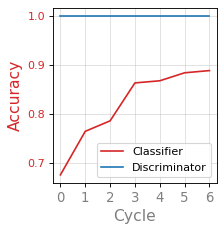

In [15]:
R.plot() 